# Visualization of results

## Import general libraries and dependencies

In [21]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.collections
import os
import sys
sys.path.append("../")

from scipy import stats

from config import results_folder, plots_folder

## Utility functions

In [2]:
def boltzmann_distribution_2D(v, kT, m):
    return (m/kT)*v*np.exp(-m*v**2/(2*kT))

def average_histogram(eq_speeds, number_of_runs, number_of_bins, m):
    hist_matrix = np.zeros((number_of_runs, number_of_bins))
    for i in range(number_of_runs):
        hist_matrix[i, :], bin_edges = np.histogram(eq_speeds[i, :], bins=number_of_bins, range=(0, 1), density=True)
#         kT = compute_kT(eq_speeds[i, :], m)
#         plt.bar(bin_edges[:-1], hist_matrix[i, :], width=0.6/number_of_bins, align='edge', label='Measured')
#         plt.plot(v, boltzmann_distribution_2D(v, kT, m), 'r', label='M-B distribution')
#         plt.show()
    hist_matrix = np.average(hist_matrix, axis=0)
    return hist_matrix, bin_edges

def compute_kT(eq_speeds, m):
    shape_array = np.shape(eq_speeds)
    if len(shape_array) == 1:
        average_kin_energy = np.sum(eq_speeds**2)*m/(2*len(eq_speeds))
    else:
        average_kin_energy = np.sum(eq_speeds[0,:]**2)*m/(2*len(eq_speeds[0, :]))
    kT = average_kin_energy
    return kT

## Problem 1: Scattering angle as a function of impact parameter

In [3]:
scattering_angle_matrix = np.load(file=os.path.join(results_folder, 'scattering_angle.npy'))

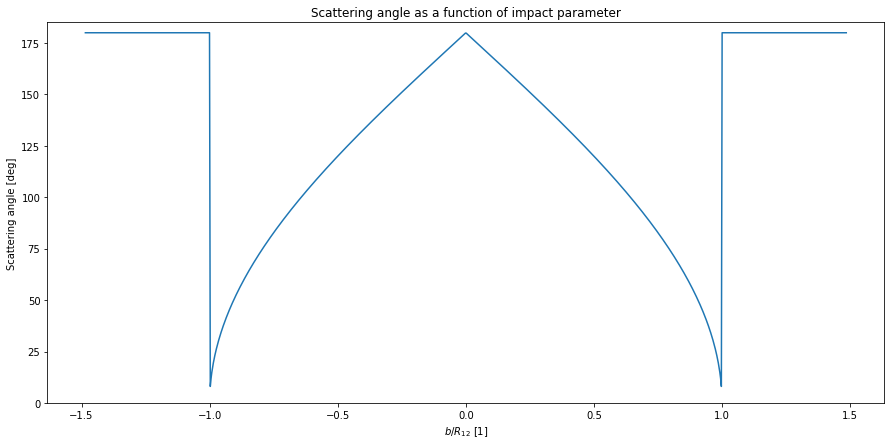

In [4]:
plt.figure(figsize=(15, 7))
plt.plot(scattering_angle_matrix[:, 0], scattering_angle_matrix[:, 1]*180/np.pi)
plt.title('Scattering angle as a function of impact parameter')
plt.xlabel(r'$b/R_{12}$ [1]')
plt.ylabel(r'Scattering angle [deg]')
plt.ylim([0, 185])
plt.savefig(os.path.join(plots_folder, 'scattering_angle.pdf'))
plt.show()

## Problem 2: Speed distribution
Parameters used:
- N = 1000
- Xi = 1
- v_0 = 0.2
- m = 1
- radius = 0.01
- stopping criterion: avg_collisions = 0.02*N
- number of runs = 20

In [5]:
initial_energy_matrix = np.load(file=os.path.join(results_folder, 'problem_2_N_1000_init_energy_matrix.npy'))
initial_speeds = initial_energy_matrix[:, 1]
N = 1000
number_of_runs = 30
number_of_bins = 140

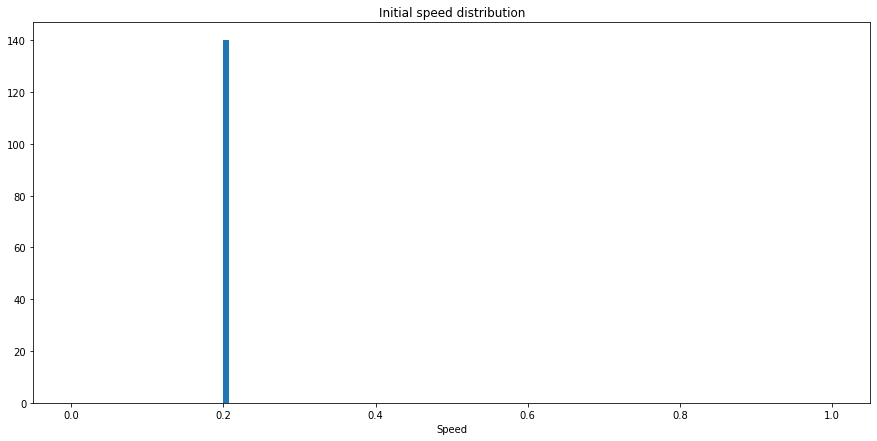

In [6]:
plt.figure(figsize=(15, 7))
hist, bin_edges = np.histogram(initial_speeds, bins=number_of_bins, range=(0, 1), density=True)
# plt.hist(initial_speeds, range=(0,0.4), bins=25)
plt.bar(bin_edges[:-1], hist, align='edge', width=1/number_of_bins)
plt.xlabel('Speed')
#plt.ylabel('Amount of particles')
plt.title('Initial speed distribution')
plt.savefig(os.path.join(plots_folder, 'init_speed.pdf'))
plt.show()

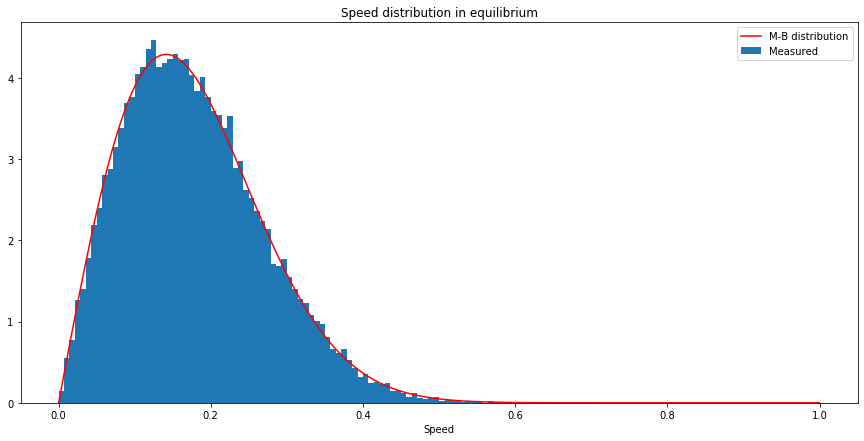

In [7]:
eq_speeds = np.zeros((number_of_runs, N))
for i in range(number_of_runs):
    energy_matrix = np.load(file=os.path.join(results_folder, f'problem_2_N_1000_eq_energy_matrix_{i}.npy'))
    eq_speeds[i, :] = energy_matrix[:, 1]

kT = compute_kT(eq_speeds, 1)

v = np.linspace(0, 1, 1000)

# average over multiple runs to achieve smoother distributions
hist_plot, bin_edges = average_histogram(eq_speeds, number_of_runs, number_of_bins, 1)

plt.figure(figsize=(15, 7))
plt.bar(bin_edges[:-1], hist_plot, width=1/number_of_bins, align='edge', label='Measured')
plt.plot(v, boltzmann_distribution_2D(v, kT, 1), 'r', label='M-B distribution')
plt.xlabel('Speed')
#plt.ylabel('Amount of particles')
plt.title('Speed distribution in equilibrium')
plt.legend()
plt.savefig(os.path.join(plots_folder, 'eq_speed.pdf'))
plt.show()

## Problem 3: Speed distribution with two different masses
Parameters used:
- N = 1000
- Xi = 1
- v_0 = 0.2
- m_0, m = 1, 4
- radius = 0.001
- stopping criterion: avg_collisions = 0.02*N
- number of runs = 10

In [8]:
N = 1000
number_of_runs = 30
number_of_bins = 140

m0 = 1
m = 4*m0

In [9]:
eq_speeds_m0 = np.zeros((number_of_runs, int(N/2)))
eq_speeds_m = np.zeros((number_of_runs, int(N/2)))
for i in range(number_of_runs):
    energy_matrix = np.load(file=os.path.join(results_folder, f'problem_3_N_1000_eq_energy_matrix_{i}.npy'))
    eq_speeds_m0[i, :] = energy_matrix[:int(N/2), 1]
    eq_speeds_m[i, :] = energy_matrix[int(N/2):, 1]

kT_m0 = compute_kT(eq_speeds_m0, m0)
kT_m = compute_kT(eq_speeds_m, m)
v = np.linspace(0, 1, 1000)

# average over multiple runs to achieve smoother distributions
hist_plot_m0, bin_edges = average_histogram(eq_speeds_m0, number_of_runs, number_of_bins, m0)
hist_plot_m, bin_edges = average_histogram(eq_speeds_m, number_of_runs, number_of_bins, m)

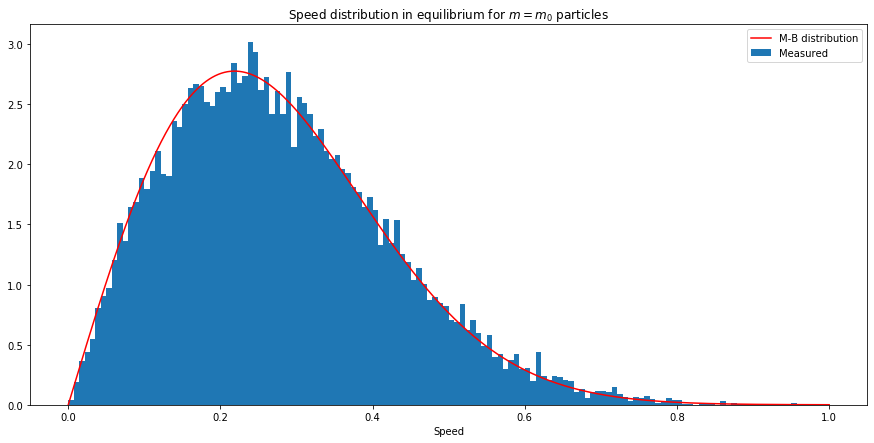

In [10]:
plt.figure(figsize=(15, 7))
mb_distribution_m0 = boltzmann_distribution_2D(v, kT_m0, m0)
plt.bar(bin_edges[:-1], hist_plot_m0, width=1/number_of_bins, align='edge', label='Measured')
plt.plot(v, mb_distribution_m0, 'r', label='M-B distribution')
plt.xlabel('Speed')
plt.title(r'Speed distribution in equilibrium for $m=m_0$ particles')
plt.legend()
plt.savefig(os.path.join(plots_folder, 'eq_speed_m0.pdf'))
plt.show()

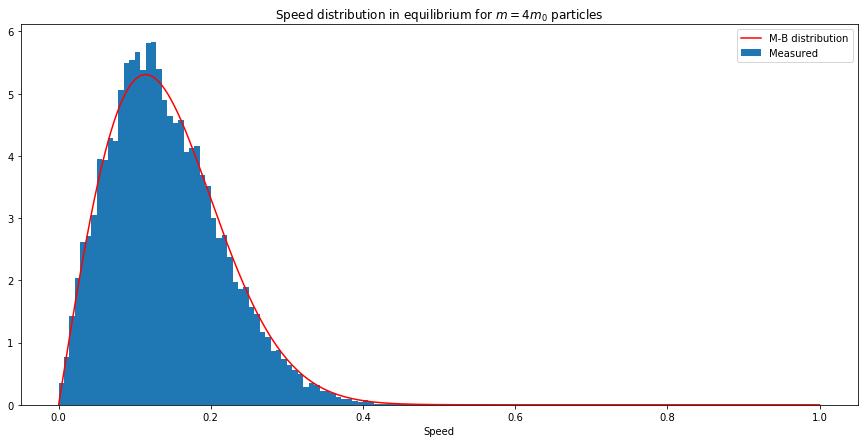

In [11]:
plt.figure(figsize=(15, 7))
mb_distribution_m = boltzmann_distribution_2D(v, kT_m, m)
plt.bar(bin_edges[:-1], hist_plot_m, width=1/number_of_bins, align='edge', label='Measured')
plt.plot(v, mb_distribution_m, 'r', label='M-B distribution')
plt.xlabel('Speed')
plt.title(r'Speed distribution in equilibrium for $m=4m_0$ particles')
plt.legend()
plt.savefig(os.path.join(plots_folder, 'eq_speed_m.pdf'))
plt.show()

## Problem 4: Energy development
Parameters used:
- N = 1000
- Xi = 0.8, 0.9, 1
- v_0 = 0.2
- radius = 0.01
- m_0, m = 1, 4
- stopping criterion: avg_collisions = 0.02*N

In [12]:
xi_list = [1, 0.9, 0.8]
N = 1000

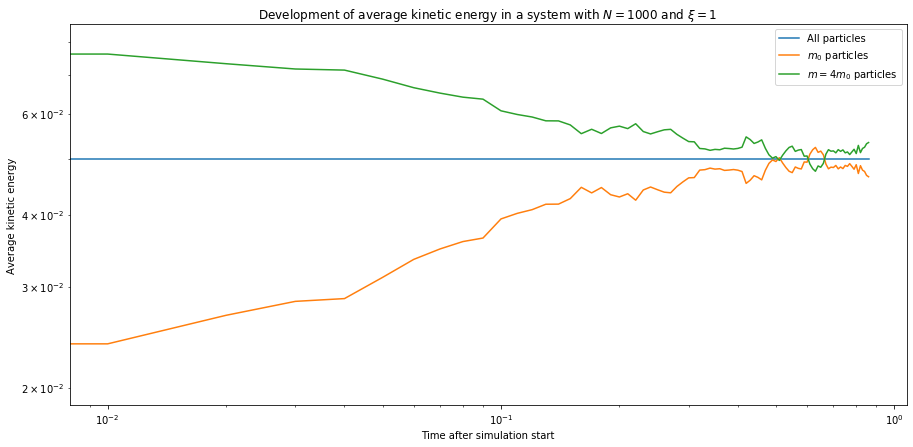

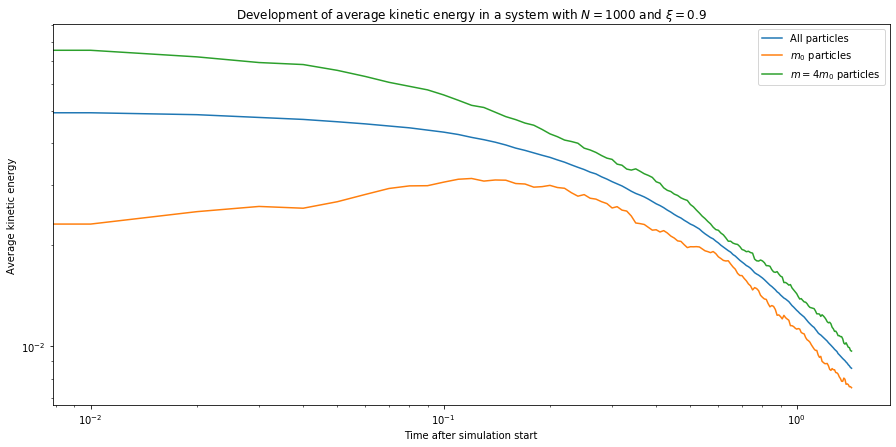

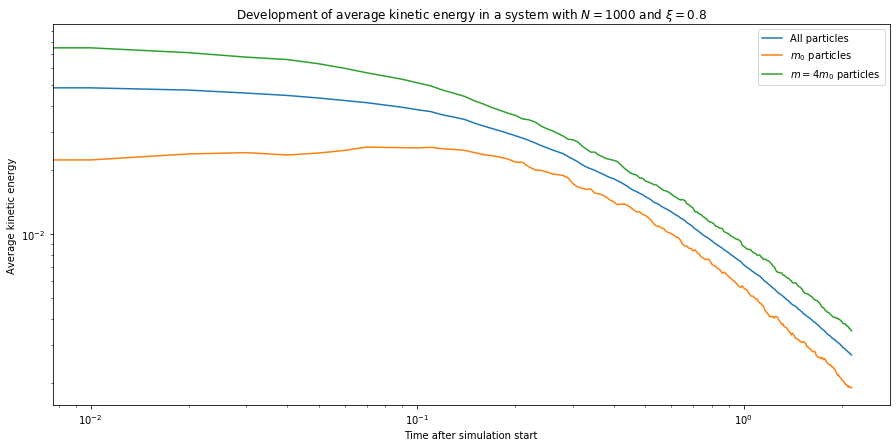

In [13]:
for xi in xi_list:
    energy_dev_matrix = np.load(file=os.path.join(results_folder, f'problem_4_N_1000_energy_development_xi_{xi}.npy'))
    time_array = energy_dev_matrix[:, 0]
    avg_energy_array = energy_dev_matrix[:, 1]
    avg_energy_m0_array = energy_dev_matrix[:, 2]
    avg_energy_m_array = energy_dev_matrix[:, 3]
    plt.figure(figsize=(15, 7))
    plt.loglog(time_array, avg_energy_array, label='All particles')
    plt.loglog(time_array, avg_energy_m0_array, label=r'$m_0$ particles')
    plt.loglog(time_array, avg_energy_m_array, label=r'$m=4m_0$ particles')
    plt.legend()
    plt.title(r'Development of average kinetic energy in a system with $N={}$ and $\xi={}$'.format(N, xi))
    plt.xlabel('Time after simulation start')
    plt.ylabel('Average kinetic energy')
    plt.savefig(os.path.join(plots_folder, f'energy_development_xi_{xi}.pdf'))
    plt.show()

## Problem 5: Parameter study of crater formation
Parameters used:
- N = 5001. 1 projectile and 5000 particles in the wall.
- Xi = [0.6, ..., 0.8]
- v_0_projectile = [2, ..., 9]
- v0_wall_particles = 0
- radius_wall_particles = 0.004
- radius_projectile = radius_wall_particles*[1, ...,10]
- mass_particles_in_wall = 1
- mass_projectile = mass_wall_particles*[3, ..., 30]
- stopping criterion: energy < 0.1*initial_energy

In [14]:
parameter_study_mass = np.load(file=os.path.join(results_folder, 'problem_5_N_5001_mass_study.npy'))
parameter_study_radius = np.load(file=os.path.join(results_folder, 'problem_5_N_5001_radius_study.npy'))
parameter_study_speed = np.load(file=os.path.join(results_folder, 'problem_5_N_5001_speed_study.npy'))
parameter_study_xi = np.load(file=os.path.join(results_folder, 'problem_5_N_5001_xi_study.npy'))

### Mass of projectile

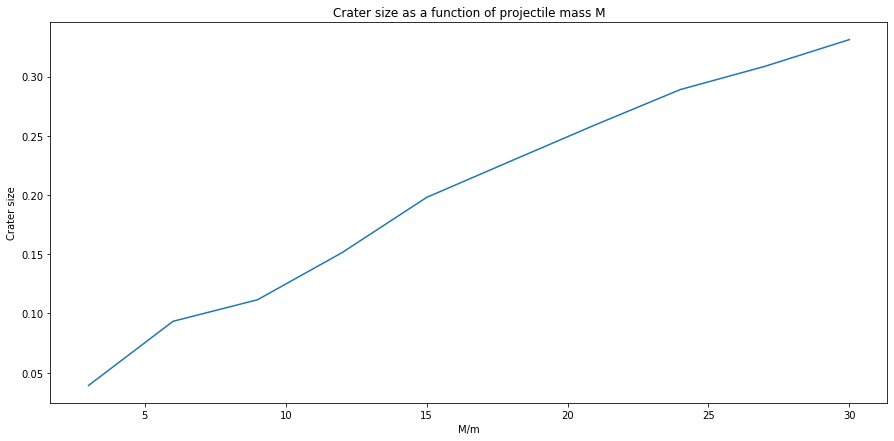

In [15]:
plt.figure(figsize=(15, 7))
plt.plot(parameter_study_mass[:, 0], parameter_study_mass[:, 1])
plt.xlabel(r'M/m')
plt.ylabel('Crater size')
plt.title('Crater size as a function of projectile mass M')
plt.savefig(os.path.join(plots_folder, f'crater_size_mass.pdf'))
plt.show()

### Radius of projectile

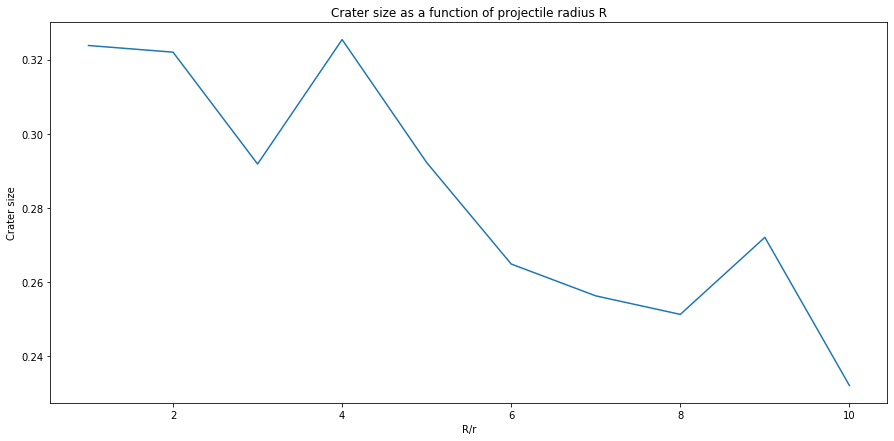

In [16]:
plt.figure(figsize=(15, 7))
plt.plot(parameter_study_radius[:, 0], parameter_study_radius[:, 1])
plt.xlabel(r'R/r')
plt.ylabel('Crater size')
plt.title('Crater size as a function of projectile radius R')
plt.savefig(os.path.join(plots_folder, f'crater_size_radius.pdf'))
plt.show()

### Speed of projectile

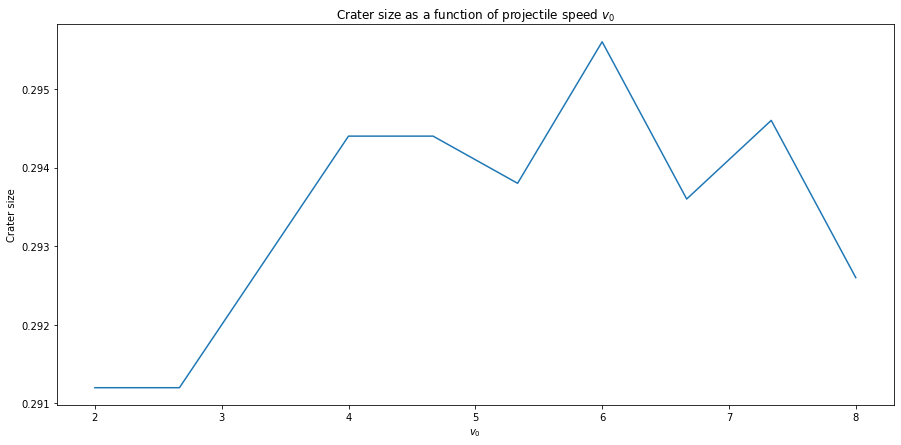

In [17]:
plt.figure(figsize=(15, 7))
plt.plot(parameter_study_speed[:, 0], parameter_study_speed[:, 1])
plt.xlabel(r'$v_0$')
plt.ylabel('Crater size')
plt.title(r'Crater size as a function of projectile speed $v_0$')
plt.savefig(os.path.join(plots_folder, f'crater_size_speed.pdf'))
plt.show()

### Restitution coefficient

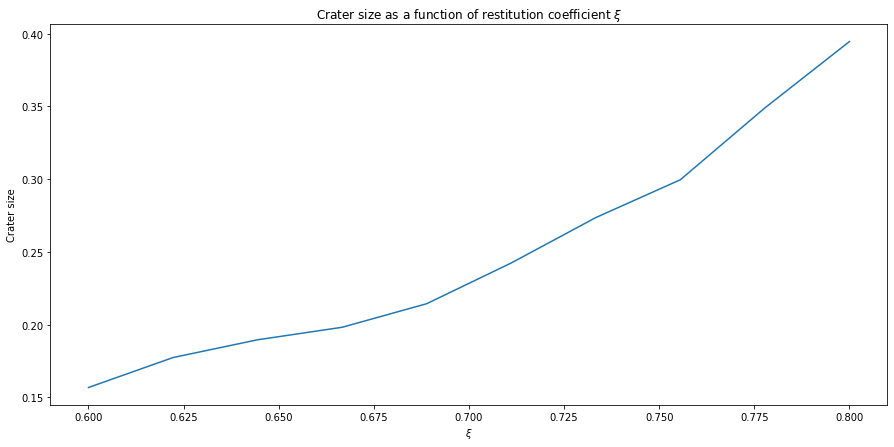

In [18]:
plt.figure(figsize=(15, 7))
plt.plot(parameter_study_xi[:, 0], parameter_study_xi[:, 1])
plt.xlabel(r'$\xi$')
plt.ylabel('Crater size')
plt.title(r'Crater size as a function of restitution coefficient $\xi$')
plt.savefig(os.path.join(plots_folder, f'crater_size_xi.pdf'))
plt.show()

## Problem 6: Mean free path

## Problem 7: Mean quadratic distance from starting point for particles in the middle
Parameters used:
- N = 2000
- Xi = 1
- v_0 = 0.2
- radius = 0.007
- mass = 1
- criterion to be in middle = distance from [0.5, 0.5] < 0.1
- stopping criterion: avg_collisions = 0.02*N

## Problem 8: Fractal properties

In [26]:
N = 2000
radius = 0.007
radius_array = np.ones(N)*radius
positions = np.load(file=os.path.join(results_folder, f'problem_8_N_{N}_rad_{radius}_fractal.npy'))

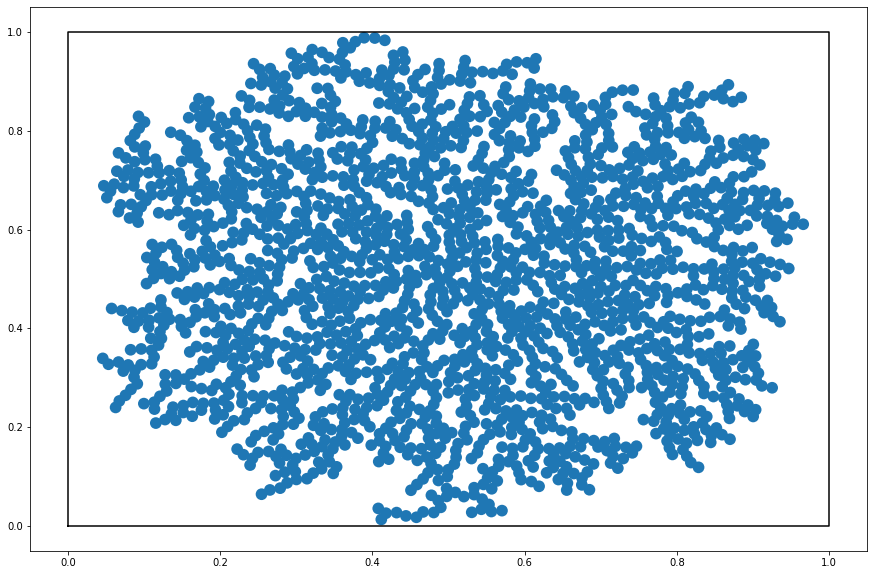

In [32]:
fig, ax = plt.subplots(figsize=(15, 10))
coll = matplotlib.collections.EllipseCollection(radius_array * 2, radius_array * 2,
                                                np.zeros_like(radius_array),
                                                offsets=positions, units='width',
                                                transOffset=ax.transData)
ax.plot([0, 1, 1, 0, 0], [0, 0, 1, 1, 0], 'k')
ax.add_collection(coll)
ax.set_xlim([-0.05, 1.05])
ax.set_ylim([-0.05, 1.05])
plt.savefig(os.path.join(plots_folder, f"fractal.pdf"))
plt.show()